# Assignment 1

In [9]:
from Blackjack import transition_matrix, policy_iteration, ALL_STATES, WIN, LOSE, DRAW

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

### Get transition matrix and reward function

In [10]:
tr_matrix, r_s_a = transition_matrix(sample_size=10 ** 5, should_print=True)

100%|██████████| 100000/100000 [00:09<00:00, 10766.00it/s]


s: (4, 1, 0), a: 0, s': win, P: 0.25
s: (4, 1, 0), a: 0, s': lose, P: 0.75
s: (4, 1, 0), a: 1, s': (6, 1, 0), P: 0.105
s: (4, 1, 0), a: 1, s': (7, 1, 0), P: 0.053
s: (4, 1, 0), a: 1, s': (8, 1, 0), P: 0.053
s: (4, 1, 0), a: 1, s': (10, 1, 0), P: 0.053
s: (4, 1, 0), a: 1, s': (11, 1, 0), P: 0.053
s: (4, 1, 0), a: 1, s': (12, 1, 0), P: 0.105
s: (4, 1, 0), a: 1, s': (13, 1, 0), P: 0.263
s: (4, 1, 0), a: 1, s': (14, 1, 0), P: 0.316
s: (4, 2, 0), a: 0, s': win, P: 0.375
s: (4, 2, 0), a: 0, s': lose, P: 0.625
s: (4, 2, 0), a: 1, s': (6, 2, 0), P: 0.188
s: (4, 2, 0), a: 1, s': (7, 2, 0), P: 0.062
s: (4, 2, 0), a: 1, s': (8, 2, 0), P: 0.125
s: (4, 2, 0), a: 1, s': (9, 2, 0), P: 0.125
s: (4, 2, 0), a: 1, s': (10, 2, 0), P: 0.062
s: (4, 2, 0), a: 1, s': (13, 2, 0), P: 0.062
s: (4, 2, 0), a: 1, s': (14, 2, 0), P: 0.312
s: (4, 2, 0), a: 1, s': (15, 2, 1), P: 0.062
s: (4, 3, 0), a: 0, s': win, P: 0.385
s: (4, 3, 0), a: 0, s': lose, P: 0.615
s: (4, 3, 0), a: 1, s': (7, 3, 0), P: 0.2
s: (4, 3, 0), a:

### create a specific policy that always hit if the player sum is less than 20

In [11]:
pi = dict()
for state in ALL_STATES:
    pi[state] = 1 if state[0] < 21 else 0
for state in [WIN, LOSE, DRAW]:
    pi[state] = 0

### create 5 random states to follow during the policy updates

In [12]:
SIZE = 5
indices = np.random.choice(np.arange(len(ALL_STATES)), size=SIZE, replace=False)
states_indices = [ALL_STATES[i] for i in indices]
states_to_print = dict(zip(states_indices, [[] for _ in range(SIZE)]))

### Run policy iteration

In [13]:
v, pi, value_avg = policy_iteration(tr_matrix, r_s_a, k=5, pi=pi, states_to_print=states_to_print)

Policy iteration converged after 5 iterations.


# plot policy changes for the chosen states

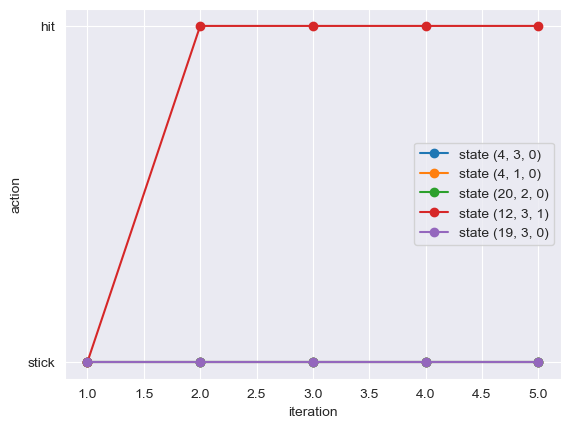

<Figure size 640x480 with 0 Axes>

In [14]:
for state, chosen_actions in states_to_print.items():
    plt.plot(np.arange(1, len(states_to_print[state]) + 1), chosen_actions, 'o-', label=f"state ({state[0]}, {state[1]}, {state[2]})")
plt.xlabel("iteration")
plt.ylabel("action")
plt.yticks([0, 1], ["stick", "hit"])
plt.legend()
plt.show()
plt.clf()

### plot value averages changes

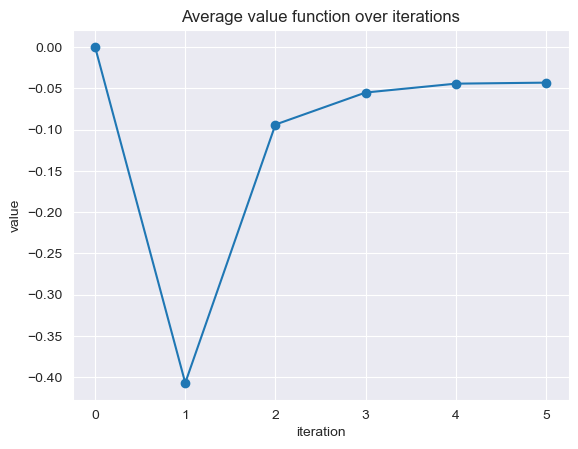

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(np.arange(len(value_avg)), value_avg, 'o-')
plt.title("Average value function over iterations")
plt.xlabel("iteration")
plt.ylabel("value")
plt.show()
plt.clf()

### plot the starting policies for unusable ace

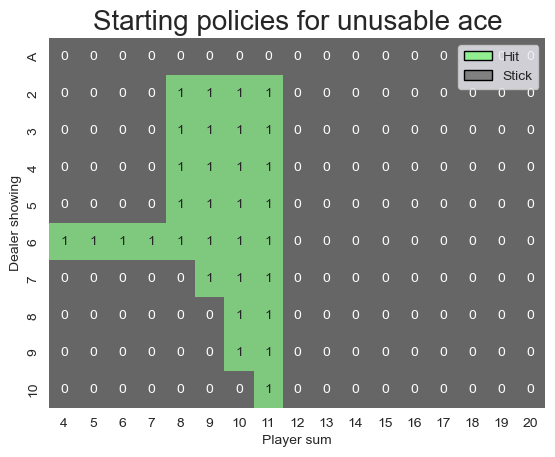

<Figure size 640x480 with 0 Axes>

In [16]:
player_count, dealer_count = np.meshgrid(
    # players count, dealers face-up card
    np.arange(4, 21),
    np.arange(1, 11),
)

# create the policy grid for plotting
pi_grid = np.apply_along_axis(
    lambda obs: pi[(obs[0], obs[1], 0)],
    axis=2,
    arr=np.dstack([player_count, dealer_count]),
)

# plot the policy for unusable ace
plt.figure()
sns.heatmap(pi_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False, xticklabels=range(4, 21), yticklabels=["A"] + list(range(2, 11)))
plt.title("Starting policies for unusable ace", fontsize=20)
plt.xlabel("Player sum")
plt.ylabel("Dealer showing")

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
plt.legend(handles=legend_elements)
plt.show()
plt.clf()